In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import semicircular
from IPython.display import HTML
import matplotlib
matplotlib.use("TkAgg")

mystyle = "https://raw.githubusercontent.com/quantgirluk/matplotlib-stylesheets/main/quant-pastel-light.mplstyle"
plt.style.use(mystyle)
plt.rcParams["figure.figsize"] = (10,5)


class RandomMatrixGOE:

    def __init__(self, n, random_state: int = None,):
        self.n = n
        self.random_state = random_state
        self.matrix = self.sample()
        self._eigenvalues = None

    def sample(self, random_state: int = None):
        if random_state is not None:
            np.random.seed(random_state)
        matrix = np.random.randn(self.n, self.n)
        self.matrix = (matrix + matrix.transpose()) / np.sqrt(2)
        self._eigenvalues = None
        return self.matrix

    def eigenvalues(self) -> np.ndarray:
        if self._eigenvalues:
            return self._eigenvalues
        self._eigenvalues = np.linalg.eigvalsh(self.matrix)
        return self._eigenvalues

In [2]:
%matplotlib inline  
# matplotlib.use("TkAgg")
from skrmt.ensemble.spectral_law import TracyWidomDistribution

def generate_sample(dim, size):
    
    N = dim
    sample = []
    for _ in range(size):
        matrix = RandomMatrixGOE(n=N)
        spectrum = matrix.eigenvalues()
        lambda_max = np.max(spectrum)
        sigma = 1.0
        lambda_max_normalized = (N**(1/6))*(lambda_max/sigma - 2*np.sqrt(N))
        sample.append(lambda_max_normalized)
    return sample

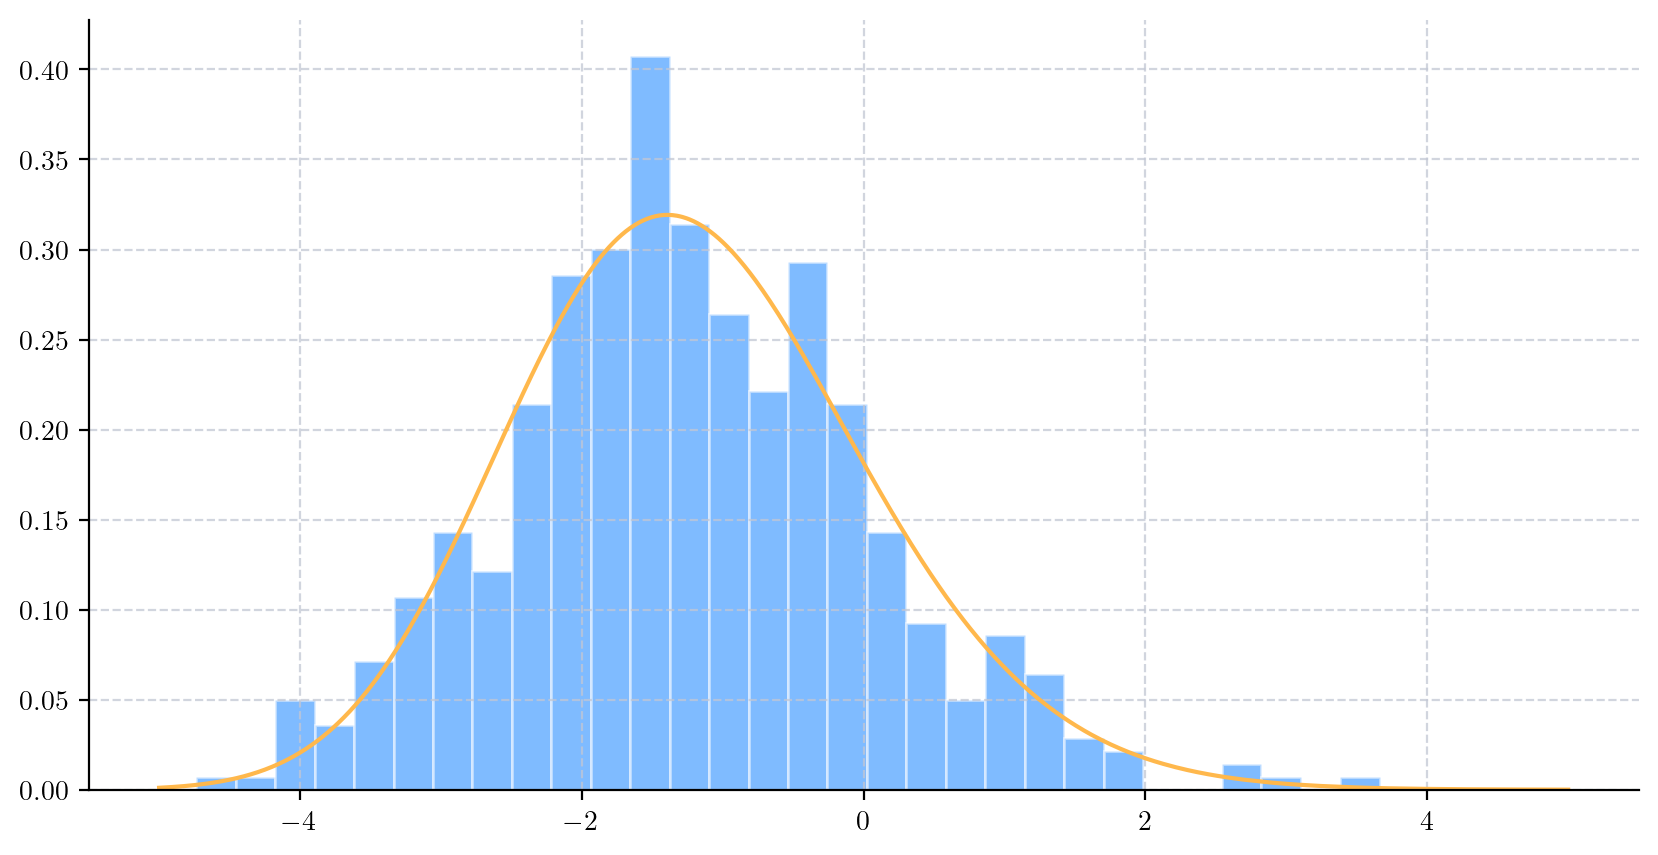

In [3]:
sample = generate_sample(dim=100, size=500)
plt.hist(sample, density=True, ec="white", alpha=0.5, bins=30)
x = np.linspace(-5.0, 5.0, 1000)
rv = TracyWidomDistribution(beta=1)
plt.plot(x, rv.pdf(x), label=f"$\\beta={1}$")
plt.show()

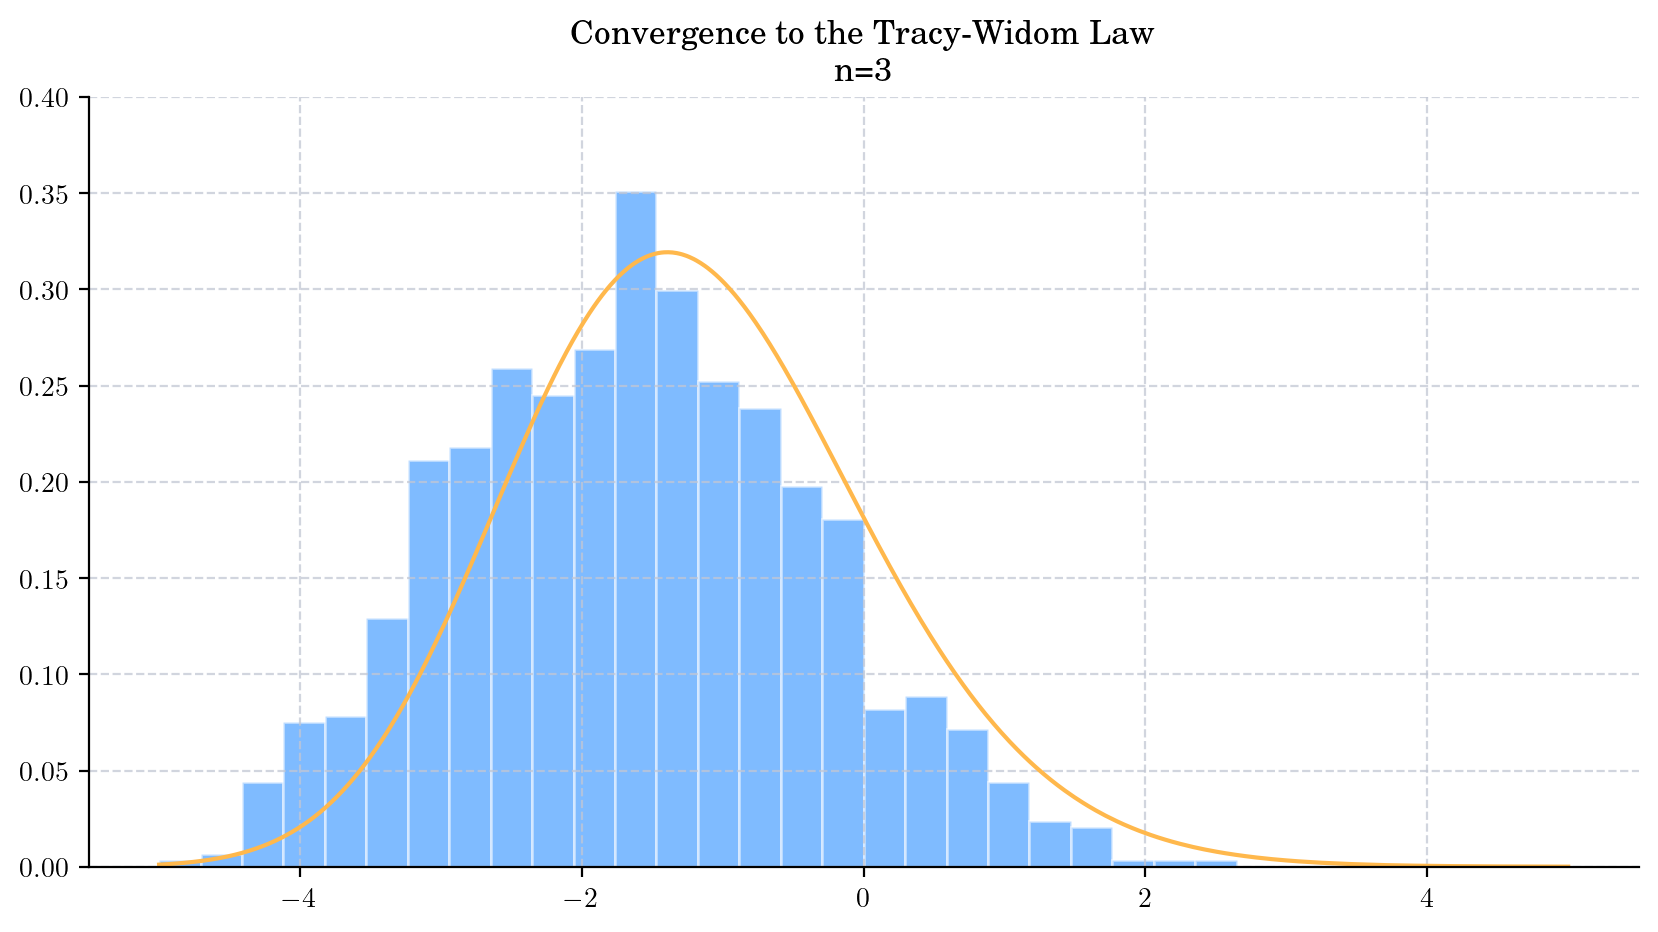

In [31]:
HIST_BINS = np.linspace(-5, 5, 35)
data = generate_sample(dim=100, size=500)
n, _ = np.histogram(data, HIST_BINS, density=True)

def prepare_animation(bar_container):
    def animate(frame_number):
        ax.set_title("Convergence to the Tracy-Widom Law \n n={}".format(frame_number))
        data = generate_sample(dim=frame_number, size=1000)
        n, _ = np.histogram(data, HIST_BINS, density=True)

        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate


fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1, ec="white", alpha=0.5)

x = np.linspace(-5.0, 5.0, 1000)
rv = TracyWidomDistribution(beta=1)
plt.plot(x, rv.pdf(x), label="Probability Density Function")
# ax.plot(x, rv.pdf(x), label="Probability Density Function", )
ax.set_ylim(top=0.4)  # set safe limit to ensure that all data is visible.

# frames = np.arange(5, 501, 50)
frames = [3, 4, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]
ani = animation.FuncAnimation(fig, prepare_animation(bar_container), frames, repeat=False, blit=False, interval=500)

# To save the animation using Pillow as a gif
# writer = animation.PillowWriter(fps=2,
#                                 metadata=dict(artist='@Quant_Girl'),
#                                 bitrate=1800)
# ani.save('20_TracyWidom_Bonus.gif', writer=writer, dpi=200)

HTML(ani.to_jshtml())